In [2]:
%matplotlib inline
import pandas as pd

In [3]:
weather = pd.read_csv('sydney_climate.csv')

In [5]:
weather.head()

,Year_Month_Day,MANGROVE_MOUNTAIN,GOSFORD,SPRINGWOOD,SYDNEY_AIRPORT,TERREY_HILLS,SYDNEY,PARRAMATTA_NORTH,BANKSTOWN_AIRPORT,HOLSWORTHY_AERODROME,...,SYDNEY_HARBOUR,PROSPECT_RESERVOIR,RICHMOND_RAAF,BADGERYS_CREEK,PENRITH_LAKES,HORSLEY_PARK_EQUESTRIAN_CENTRE,CAMDEN_AIRPORT,BELLAMBI,PORT_KEMBLA_NTC,CAMPBELLTOWN
0,2016-01-02,24.5,24.8,25.2,25.3,23.3,25.4,24.9,26.1,26.2,...,22.6,26.1,26.6,28.8,28.2,26.7,27.5,22.9,22.0,27.6
1,2016-01-03,21.2,23.4,21.0,24.3,NaN,24.6,25.0,25.6,24.1,...,22.7,24.0,24.3,24.6,23.6,23.3,24.6,22.9,22.9,24.6
2,2016-01-04,22.2,24.4,20.1,25.4,NaN,23.6,21.8,23.6,23.5,...,23.1,23.0,22.3,22.1,21.1,22.8,23.0,22.4,21.8,23.1
3,2016-01-05,18.6,20.6,16.2,21.0,NaN,20.3,19.8,20.5,19.9,...,20.7,19.2,19.8,19.3,18.8,18.9,19.8,21.0,21.3,20.4
4,2016-01-06,16.4,19.0,18.4,19.2,NaN,18.6,19.0,20.0,20.5,...,19.9,19.7,21.2,21.2,21.4,20.3,21.4,19.6,19.8,20.8


In [8]:
weather.dtypes

Year_Month_Day                     object
MANGROVE_MOUNTAIN                 float64
GOSFORD                           float64
SPRINGWOOD                        float64
SYDNEY_AIRPORT                    float64
TERREY_HILLS                      float64
SYDNEY                            float64
PARRAMATTA_NORTH                  float64
BANKSTOWN_AIRPORT                 float64
HOLSWORTHY_AERODROME              float64
CANTERBURY_RACECOURSE             float64
SYDNEY_HARBOUR                    float64
PROSPECT_RESERVOIR                float64
RICHMOND_RAAF                     float64
BADGERYS_CREEK                    float64
PENRITH_LAKES                     float64
HORSLEY_PARK_EQUESTRIAN_CENTRE    float64
CAMDEN_AIRPORT                    float64
BELLAMBI                          float64
PORT_KEMBLA_NTC                   float64
CAMPBELLTOWN                      float64
dtype: object

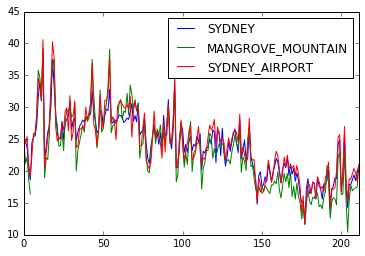

In [12]:
weather[['SYDNEY', 'MANGROVE_MOUNTAIN', 'SYDNEY_AIRPORT']].plot()

In [13]:
import seaborn as sb

In [16]:
weather.dropna(inplace=True)

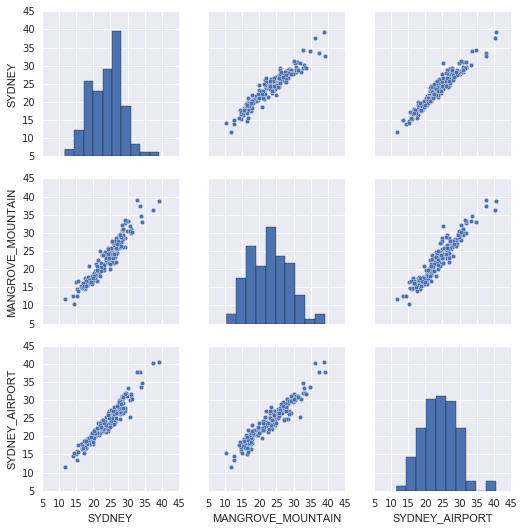

In [17]:
sb.pairplot(weather[['SYDNEY', 'MANGROVE_MOUNTAIN', 'SYDNEY_AIRPORT']])

In [22]:
import sklearn.linear_model
import matplotlib.pyplot as plt

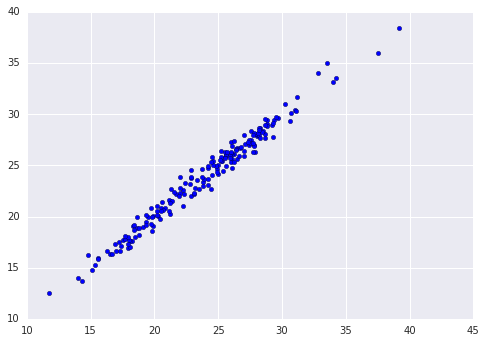

In [24]:
ols = sklearn.linear_model.LinearRegression()
non_syd_col = [x for x in weather.columns if x not in ['SYDNEY', 'Year_Month_Day']]
ols.fit(weather[non_syd_col], weather.SYDNEY)
predictions = ols.predict(weather[non_syd_col])
plt.scatter(weather.SYDNEY, predictions)

In [27]:
ols.fit?

##### We should score this

In [25]:
ols.score(weather[non_syd_col], weather.SYDNEY)

0.97840261999037548

In [26]:
zip(non_syd_col, ols.coef_)

[('MANGROVE_MOUNTAIN', -0.26220631164824293),
 ('GOSFORD', 0.1357676309725416),
 ('SPRINGWOOD', 0.10356996984971881),
 ('SYDNEY_AIRPORT', -0.15399718905104029),
 ('TERREY_HILLS', 0.41991260599990859),
 ('PARRAMATTA_NORTH', 0.39702053248216057),
 ('BANKSTOWN_AIRPORT', -0.035978722658213162),
 ('HOLSWORTHY_AERODROME', 0.17478117127800172),
 ('CANTERBURY_RACECOURSE', -0.080282870119453689),
 ('SYDNEY_HARBOUR', 0.43403900742427937),
 ('PROSPECT_RESERVOIR', -0.048002716084284525),
 ('RICHMOND_RAAF', 0.079538542262050579),
 ('BADGERYS_CREEK', -0.051296195240681151),
 ('PENRITH_LAKES', 0.01499540235788418),
 ('HORSLEY_PARK_EQUESTRIAN_CENTRE', -0.34343871333617398),
 ('CAMDEN_AIRPORT', 0.025221908647474735),
 ('BELLAMBI', 0.13797446309147127),
 ('PORT_KEMBLA_NTC', -0.0087360771503590604),
 ('CAMPBELLTOWN', 0.13329920380432689)]

# Lasso

In [32]:
lasso = sklearn.linear_model.Lasso(alpha=10)
lasso.fit(weather[non_syd_col], weather.SYDNEY)
print lasso.score(weather[non_syd_col], weather.SYDNEY)
print lasso.intercept_
zip(non_syd_col, lasso.coef_)

0.786371282308
12.3518656535


[('MANGROVE_MOUNTAIN', 0.0),
 ('GOSFORD', 0.0),
 ('SPRINGWOOD', 0.0),
 ('SYDNEY_AIRPORT', 0.0),
 ('TERREY_HILLS', 0.0),
 ('PARRAMATTA_NORTH', 0.0),
 ('BANKSTOWN_AIRPORT', 0.0),
 ('HOLSWORTHY_AERODROME', 0.0),
 ('CANTERBURY_RACECOURSE', 0.0),
 ('SYDNEY_HARBOUR', 0.0),
 ('PROSPECT_RESERVOIR', 0.0),
 ('RICHMOND_RAAF', 0.0),
 ('BADGERYS_CREEK', 0.0),
 ('PENRITH_LAKES', 0.45950055859491051),
 ('HORSLEY_PARK_EQUESTRIAN_CENTRE', 0.0),
 ('CAMDEN_AIRPORT', 0.0),
 ('BELLAMBI', 0.0),
 ('PORT_KEMBLA_NTC', 0.0),
 ('CAMPBELLTOWN', 0.0)]

In [33]:
lasso = sklearn.linear_model.Lasso(alpha=8)
lasso.fit(weather[non_syd_col], weather.SYDNEY)
print lasso.score(weather[non_syd_col], weather.SYDNEY)
print lasso.intercept_
zip(non_syd_col, lasso.coef_)

0.834279459686
10.9496456655


[('MANGROVE_MOUNTAIN', 0.0),
 ('GOSFORD', 0.0),
 ('SPRINGWOOD', 0.0),
 ('SYDNEY_AIRPORT', 0.0),
 ('TERREY_HILLS', 0.0),
 ('PARRAMATTA_NORTH', 0.0),
 ('BANKSTOWN_AIRPORT', 0.0),
 ('HOLSWORTHY_AERODROME', 0.0),
 ('CANTERBURY_RACECOURSE', 0.0),
 ('SYDNEY_HARBOUR', 0.0),
 ('PROSPECT_RESERVOIR', 0.10698149653107916),
 ('RICHMOND_RAAF', 0.0),
 ('BADGERYS_CREEK', 0.0),
 ('PENRITH_LAKES', 0.41088294779003126),
 ('HORSLEY_PARK_EQUESTRIAN_CENTRE', 0.0),
 ('CAMDEN_AIRPORT', 0.0),
 ('BELLAMBI', 0.0),
 ('PORT_KEMBLA_NTC', 0.0),
 ('CAMPBELLTOWN', 0.0)]

In [34]:
lasso = sklearn.linear_model.Lasso(alpha=5)
lasso.fit(weather[non_syd_col], weather.SYDNEY)
print lasso.score(weather[non_syd_col], weather.SYDNEY)
print lasso.intercept_
zip(non_syd_col, lasso.coef_)

0.89878454664
8.6309864533


[('MANGROVE_MOUNTAIN', 0.0),
 ('GOSFORD', 0.0),
 ('SPRINGWOOD', 0.061339823397065209),
 ('SYDNEY_AIRPORT', 0.0),
 ('TERREY_HILLS', 0.052516567927554679),
 ('PARRAMATTA_NORTH', 0.0),
 ('BANKSTOWN_AIRPORT', 0.0),
 ('HOLSWORTHY_AERODROME', 0.16029915949198631),
 ('CANTERBURY_RACECOURSE', 0.0),
 ('SYDNEY_HARBOUR', 0.0),
 ('PROSPECT_RESERVOIR', 0.14310562519964867),
 ('RICHMOND_RAAF', 0.0),
 ('BADGERYS_CREEK', 0.0),
 ('PENRITH_LAKES', 0.21160595085958217),
 ('HORSLEY_PARK_EQUESTRIAN_CENTRE', 0.0),
 ('CAMDEN_AIRPORT', 0.0),
 ('BELLAMBI', 0.0),
 ('PORT_KEMBLA_NTC', 0.0),
 ('CAMPBELLTOWN', 0.0)]

##### If your alpha = 0 that is the same as Linear Regression 

In [36]:
lasso = sklearn.linear_model.Lasso(alpha=0)
lasso.fit(weather[non_syd_col], weather.SYDNEY)
print lasso.score(weather[non_syd_col], weather.SYDNEY)
print lasso.intercept_
zip(non_syd_col, lasso.coef_)

0.978306913505
-0.262419676078


/Users/allenbyron/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  from ipykernel import kernelapp as app
/Users/allenbyron/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:454: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/Users/allenbyron/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


[('MANGROVE_MOUNTAIN', -0.26839143680134769),
 ('GOSFORD', 0.11347047407325443),
 ('SPRINGWOOD', 0.1159578297330459),
 ('SYDNEY_AIRPORT', -0.15806744520109486),
 ('TERREY_HILLS', 0.43717233515121717),
 ('PARRAMATTA_NORTH', 0.41684603645390422),
 ('BANKSTOWN_AIRPORT', -0.0063126446208694089),
 ('HOLSWORTHY_AERODROME', 0.21061609595464828),
 ('CANTERBURY_RACECOURSE', -0.11081164031470886),
 ('SYDNEY_HARBOUR', 0.44503854161226603),
 ('PROSPECT_RESERVOIR', -0.018936649170409284),
 ('RICHMOND_RAAF', 0.1114839282864732),
 ('BADGERYS_CREEK', -0.05496214604435188),
 ('PENRITH_LAKES', -0.016780972257522932),
 ('HORSLEY_PARK_EQUESTRIAN_CENTRE', -0.42910196536433304),
 ('CAMDEN_AIRPORT', 0.023967769742515996),
 ('BELLAMBI', 0.13439199087120401),
 ('PORT_KEMBLA_NTC', -0.019148223124618294),
 ('CAMPBELLTOWN', 0.14223559914384729)]

# Ridge

In [37]:
ridge = sklearn.linear_model.Ridge(alpha=5)
ridge.fit(weather[non_syd_col], weather.SYDNEY)
print ridge.score(weather[non_syd_col], weather.SYDNEY)
print ridge.intercept_
zip(non_syd_col, ridge.coef_)

0.978294341587
-0.35265640585


[('MANGROVE_MOUNTAIN', -0.22933959654083516),
 ('GOSFORD', 0.13941040117021344),
 ('SPRINGWOOD', 0.09961486642191518),
 ('SYDNEY_AIRPORT', -0.14078591337161117),
 ('TERREY_HILLS', 0.37560473528304417),
 ('PARRAMATTA_NORTH', 0.32157790028616079),
 ('BANKSTOWN_AIRPORT', -0.016785023563703403),
 ('HOLSWORTHY_AERODROME', 0.14932374210474242),
 ('CANTERBURY_RACECOURSE', -0.031126191163616989),
 ('SYDNEY_HARBOUR', 0.41244690685409785),
 ('PROSPECT_RESERVOIR', -0.059288781169310641),
 ('RICHMOND_RAAF', 0.073200459268872836),
 ('BADGERYS_CREEK', -0.049417654813359871),
 ('PENRITH_LAKES', 0.010953082422367127),
 ('HORSLEY_PARK_EQUESTRIAN_CENTRE', -0.26177988054083245),
 ('CAMDEN_AIRPORT', 0.024479842744719059),
 ('BELLAMBI', 0.12242837896553763),
 ('PORT_KEMBLA_NTC', 0.019488285126847797),
 ('CAMPBELLTOWN', 0.11047520324946611)]

# ElasticNet
The cross validation (CV) has sorted out the alpha, correct?

In [43]:
elastic = sklearn.linear_model.ElasticNetCV()
elastic.fit(weather[non_syd_col], weather.SYDNEY)
print elastic.score(weather[non_syd_col], weather.SYDNEY)
print elastic.intercept_
zip(non_syd_col, elastic.coef_)

0.975022914539
0.192580532447


[('MANGROVE_MOUNTAIN', -0.0),
 ('GOSFORD', 0.020071937512208385),
 ('SPRINGWOOD', 0.057864519276811223),
 ('SYDNEY_AIRPORT', 0.0),
 ('TERREY_HILLS', 0.27654019903663069),
 ('PARRAMATTA_NORTH', 0.068083400547409578),
 ('BANKSTOWN_AIRPORT', 0.0),
 ('HOLSWORTHY_AERODROME', 0.060809078951504419),
 ('CANTERBURY_RACECOURSE', 0.0),
 ('SYDNEY_HARBOUR', 0.37984574372102708),
 ('PROSPECT_RESERVOIR', 0.0),
 ('RICHMOND_RAAF', 0.0),
 ('BADGERYS_CREEK', 0.0),
 ('PENRITH_LAKES', 0.0),
 ('HORSLEY_PARK_EQUESTRIAN_CENTRE', 0.0),
 ('CAMDEN_AIRPORT', 0.0),
 ('BELLAMBI', 0.03537795775878988),
 ('PORT_KEMBLA_NTC', 0.11557884553180535),
 ('CAMPBELLTOWN', 0.033922895564349333)]

# Scaling

Scaling matter bcause th range of these temperatures is not exactly the same.

Note: std of Penrith is high

In [45]:
weather[non_syd_col].std()

MANGROVE_MOUNTAIN                 5.688594
GOSFORD                           4.974931
SPRINGWOOD                        5.796824
SYDNEY_AIRPORT                    5.079707
TERREY_HILLS                      5.106845
PARRAMATTA_NORTH                  5.402940
BANKSTOWN_AIRPORT                 5.556021
HOLSWORTHY_AERODROME              5.673538
CANTERBURY_RACECOURSE             5.020166
SYDNEY_HARBOUR                    3.653828
PROSPECT_RESERVOIR                5.911210
RICHMOND_RAAF                     5.827525
BADGERYS_CREEK                    5.907684
PENRITH_LAKES                     6.171921
HORSLEY_PARK_EQUESTRIAN_CENTRE    5.714526
CAMDEN_AIRPORT                    5.824256
BELLAMBI                          3.954496
PORT_KEMBLA_NTC                   3.689115
CAMPBELLTOWN                      5.767958
dtype: float64

##### Note the difference between StandardScaler and RobustScaler

RobustScaler ditches outliers

In [46]:
import sklearn.preprocessing

In [52]:
standardscaler = sklearn.preprocessing.StandardScaler()
scaled_weather = standardscaler.fit_transform(weather[non_syd_col])

print scaled_weather[:,0].mean()
print scaled_weather[:,0].std()

scaled_weather.mean(), scaled_weather.std()

-1.49587944371e-16
1.0


(-4.330177337042162e-17, 1.0)

In [53]:
robust = sklearn.preprocessing.RobustScaler()
scaled_weather = robust.fit_transform(weather[non_syd_col])
scaled_weather.mean(), scaled_weather.std()

(-0.056111592497093556, 0.67702148976755749)

##### The below is good but will need to also scale weather.SYDNE

In [55]:
lasso = sklearn.linear_model.Lasso(alpha=1)
lasso.fit(scaled_weather, weather.SYDNEY)
print lasso.score(scaled_weather, weather.SYDNEY)
print lasso.intercept_
zip(non_syd_col, lasso.coef_)

0.874303596647
24.3277510923


[('MANGROVE_MOUNTAIN', 0.0),
 ('GOSFORD', 0.0),
 ('SPRINGWOOD', 0.0),
 ('SYDNEY_AIRPORT', 1.7125039031532008),
 ('TERREY_HILLS', 0.0),
 ('PARRAMATTA_NORTH', 0.0),
 ('BANKSTOWN_AIRPORT', 0.0),
 ('HOLSWORTHY_AERODROME', 0.0),
 ('CANTERBURY_RACECOURSE', 0.0),
 ('SYDNEY_HARBOUR', 2.3260912003496461),
 ('PROSPECT_RESERVOIR', 0.0),
 ('RICHMOND_RAAF', 0.0),
 ('BADGERYS_CREEK', 0.0),
 ('PENRITH_LAKES', 0.0),
 ('HORSLEY_PARK_EQUESTRIAN_CENTRE', 0.0),
 ('CAMDEN_AIRPORT', 0.0),
 ('BELLAMBI', 0.33219156534075533),
 ('PORT_KEMBLA_NTC', 0.0),
 ('CAMPBELLTOWN', 0.0)]

In [57]:
y_scaler = sklearn.preprocessing.RobustScaler()
sydney_transformed = y_scaler.fit_transform(weather[['SYDNEY']])

##### Alpha still too big

In [58]:
lasso = sklearn.linear_model.Lasso(alpha=1)
lasso.fit(scaled_weather, sydney_transformed)
print lasso.score(scaled_weather, sydney_transformed)
print lasso.intercept_
zip(non_syd_col, lasso.coef_)

0.0
[-0.0845735]


[('MANGROVE_MOUNTAIN', 0.0),
 ('GOSFORD', 0.0),
 ('SPRINGWOOD', 0.0),
 ('SYDNEY_AIRPORT', 0.0),
 ('TERREY_HILLS', 0.0),
 ('PARRAMATTA_NORTH', 0.0),
 ('BANKSTOWN_AIRPORT', 0.0),
 ('HOLSWORTHY_AERODROME', 0.0),
 ('CANTERBURY_RACECOURSE', 0.0),
 ('SYDNEY_HARBOUR', 0.0),
 ('PROSPECT_RESERVOIR', 0.0),
 ('RICHMOND_RAAF', 0.0),
 ('BADGERYS_CREEK', 0.0),
 ('PENRITH_LAKES', 0.0),
 ('HORSLEY_PARK_EQUESTRIAN_CENTRE', 0.0),
 ('CAMDEN_AIRPORT', 0.0),
 ('BELLAMBI', 0.0),
 ('PORT_KEMBLA_NTC', 0.0),
 ('CAMPBELLTOWN', 0.0)]

##### Decreased alpha to 0.1

In [59]:
lasso = sklearn.linear_model.Lasso(alpha=0.1)
lasso.fit(scaled_weather, sydney_transformed)
print lasso.score(scaled_weather, sydney_transformed)
print lasso.intercept_
zip(non_syd_col, lasso.coef_)

0.919718775426
[-0.02330258]


[('MANGROVE_MOUNTAIN', 0.0),
 ('GOSFORD', 0.0),
 ('SPRINGWOOD', 0.0),
 ('SYDNEY_AIRPORT', 0.18465190706543808),
 ('TERREY_HILLS', 0.10051723935097105),
 ('PARRAMATTA_NORTH', 0.010225190122128646),
 ('BANKSTOWN_AIRPORT', 0.0),
 ('HOLSWORTHY_AERODROME', 0.0),
 ('CANTERBURY_RACECOURSE', 0.0),
 ('SYDNEY_HARBOUR', 0.31911689828792311),
 ('PROSPECT_RESERVOIR', 0.0),
 ('RICHMOND_RAAF', 0.0),
 ('BADGERYS_CREEK', 0.0),
 ('PENRITH_LAKES', 0.0),
 ('HORSLEY_PARK_EQUESTRIAN_CENTRE', 0.0),
 ('CAMDEN_AIRPORT', 0.0),
 ('BELLAMBI', 0.068290498561999841),
 ('PORT_KEMBLA_NTC', 0.0),
 ('CAMPBELLTOWN', 0.0)]

##### ElasticNet 

In [60]:
elastic = sklearn.linear_model.ElasticNetCV()
elastic.fit(scaled_weather, sydney_transformed)
print elastic.score(scaled_weather, sydney_transformed)
print elastic.intercept_
zip(non_syd_col, elastic.coef_)

0.974926137865
-0.00758180265474


/Users/allenbyron/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:1051: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[('MANGROVE_MOUNTAIN', 0.0),
 ('GOSFORD', 0.044460927220251488),
 ('SPRINGWOOD', 0.055031676471713344),
 ('SYDNEY_AIRPORT', 0.0),
 ('TERREY_HILLS', 0.23144598211329401),
 ('PARRAMATTA_NORTH', 0.090615343027094342),
 ('BANKSTOWN_AIRPORT', 0.0019808373838274551),
 ('HOLSWORTHY_AERODROME', 0.045505687224362518),
 ('CANTERBURY_RACECOURSE', 0.016716562098215166),
 ('SYDNEY_HARBOUR', 0.26607574348059754),
 ('PROSPECT_RESERVOIR', 0.0),
 ('RICHMOND_RAAF', 0.0),
 ('BADGERYS_CREEK', 0.0),
 ('PENRITH_LAKES', 0.0),
 ('HORSLEY_PARK_EQUESTRIAN_CENTRE', 0.0),
 ('CAMDEN_AIRPORT', 0.0),
 ('BELLAMBI', 0.042219532389455222),
 ('PORT_KEMBLA_NTC', 0.074600686325061866),
 ('CAMPBELLTOWN', 0.048006909363901409)]

# Outputting Predictions

In [61]:
elastic.predict(scaled_weather)[0]

0.024229725354342063

In [63]:
y_scaler.inverse_transform([[0.024229725354342063]])

array([[ 24.72566551]])

/Users/allenbyron/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:965: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/allenbyron/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:1037: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


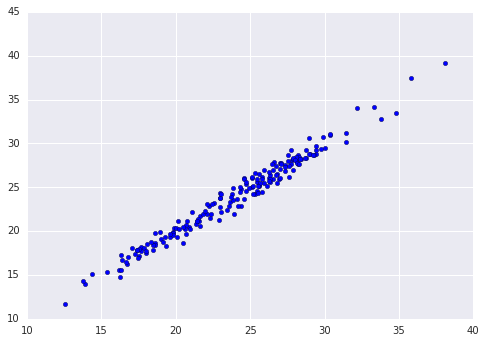

In [64]:
transformed_space_predictions = elastic.predict(scaled_weather)
reality_predictions = y_scaler.inverse_transform(transformed_space_predictions)
plt.scatter(reality_predictions, weather.SYDNEY)